# Evaluation of error-function derivatives

From the discussion in Section 5.2, it is clear that for finding the local minima of error functions in the weight space, we should use gradient descent approaches in practice, which iteratively make use of the error function derivatives with respect to the weights to modify the weights. And here, we shall introduce an efficient approach to evaluating the error function derivatives.

So far, the error functions we mentioned are all defined by likelihood functions (cross-entropy is equivalent to the negative log likelihood). These error functions have the form

$$E(\mathbf{w}) = \sum_{n=1}^N E_n(\mathbf{w}) \tag{5.44}$$

where 
- $E(\mathbf{w})$ denotes the error of the overall traning set that comprises a set of i.i.d. data.
- $E_n(\mathbf{w})$ denotes the error of one data point in the training set.

Here we shall consider the problem of evaluating $\nabla E_n(\mathbf{w})$ for one such term in the error function. This may be used directly for sequential optimization, or the results can be accumulated over the training set in the case of batch methods.


## <font color='red'>Error Backpropagation</font>

### Derivative
$\nabla E_n(\mathbf{w})$ is a vector that comprises all the partial derivatives of the weights in the network.

$$\nabla E_n(\mathbf{w}) = \begin{bmatrix}\cdots &\frac{\partial E_n}{\partial w_{ji}} &\cdots\end{bmatrix}$$

where
- $E_n$ denotes the error of one data point in the training set.
- $w_{ji}$ denotes the weight of the connection between the $i^{th}$ unit of the one layer and the $j^{th}$ unit of the next layer.

Now, we introduce the activation of unit $j$ that is denoted by $a_j$. We can therefore apply the chain rule for partial derivatives to give

<font color='red'>$$\begin{align*}
\frac{\partial E_n}{\partial w_{ji}} &= \frac{\partial E_n}{\partial a_j}\frac{\partial a_j}{\partial w_{ji}} \tag{5.50}\\
&= \frac{\partial E_n}{\partial a_j}\frac{\sum_i w_{ji}z_i }{\partial w_{ji}}\qquad \text{activation is the linear combination of inputs}\\
&= \delta_j z_i\quad \left\{
\begin{array}{ll} 
\delta_j\equiv\frac{\partial E_n}{\partial a_j}\quad \delta\text{'s are referred to as errors of unit } j\\
 z_i = \frac{\partial a_j}{\partial w_{ji}}\quad \text{where } z_i \text{ is the input corresponding to the weight } w_{ji}
\end{array} \right. \tag{5.53}
\end{align*}$$</font>

It is intuitive that $z_i$ is the output of unit $i$ and also the input of the weight $w_{ji}$ that is between unit $i$ and unit $j$. However, $\delta$ is more complex so that we shall discuss it in more details below.


### Error of output units

From Section 5.2, we have obtained the results of $\frac{\partial E}{\partial a_{k}}$ in the cases of regression, sigmoid and softmax. They all takes the form

<font color='orange'>$$\delta_k = \frac{\partial E_n}{\partial a_k} = y_k-t_k \tag{5.54}$$</font>

which is the error between the output $y_k$ and the target $t_k$.


### Error of hidden units

For the layer that is previous to the output layer (hidden layers), the error of the unit $j$ of the layer can be obtained by

$$\begin{align*}
\color{blue}{\delta_j} &\equiv \frac{\partial E_n}{\partial a_j}\\
&=\sum_k \frac{\partial E_n}{\partial a_k}\frac{\partial a_k}{\partial a_j} \qquad\text{multivariable chain rule} \tag{5.55}\\
&=\sum_k \delta_k \cdot \frac{\partial \left(\sum_{j}w_{kj}z_j\right)}{\partial a_j}\\
&=\sum_k \delta_k \cdot \frac{\partial \left(\sum_{j}w_{kj}h(a_j)\right)}{\partial a_j}\\
&=\sum_k \delta_k \cdot  h'(a_j)w_{kj}\\
&=h'(a_j)\sum_{k}w_{kj}\color{blue}{\delta_k} \tag{5.56}
\end{align*}$$

<font color='red'>which tells us that the value of $\delta$ for a particular hidden unit can be obtained by propagating the $\delta$'s backwards from units higher up in the network.</font>

### Conclusion
The backpropagation procedure can therefore be summarized as follows.
> 1. Apply and input vector $\mathbf{x}_n$ to the network and forward propagate through the network using (5.48) and (5.49) to find the activations of the hidden and output units.
> 2. Evaluate the $\delta_k$ for the output unit using (5.54).
> 3. Backpropagate the $\delta$'s using (5.56) to obtain $\delta_j$ for each hidden unit in the network.
> 4. Use (5.53) to evaluate the required derivatives.

For batch methods, the derivative of the total error $E$ can then be obtained by repeating the above steps for each pattern in the training set and then summing over all patterns:

$$\frac{\partial E}{\partial w_{ji}} = \sum_{n}\frac{\partial E_n}{\partial w_{ji}} \tag{5.57}$$



---------------
# A simple example

Consider a two-layer feed-forward network for regression.

## Activation functions
- **Hidden layer**. The hidden units have logistic sigmoid activation functions given by
$$h(a) \equiv tanh(a) = \frac{e^a-e^{-a}}{e^a+e^{-a}}\tag{5.58,5.59}$$
Its derivative can be expressed in a particularly simple form:
$$h'(a) = 1-h(a)^2 \tag{5.60}$$
- **Output layer**. The output units have linear activation functions, so that
$$y_k = a_k$$

## Error function

For regression, we use a standard sum-of-squares error function, so that for parttern $n$ the error is given by
$$E_n = \frac{1}{2}\sum_{k=1}^K (y_k-t_k)^2$$

## Forward propagation

$$\begin{align*}
a_j &= \sum_{i=0}^D w_{ji}^{(1)}x_i \tag{5.62}\\
z_j &= tanh(a_j) \tag{5.63}\\
y_k &= \sum_{j=0}^M w_{kj}^{(2)}z_j \tag{5.64}
\end{align*}$$

## Backward propagation

$$\begin{align*}
\delta_k &= y_k-t_k \tag{5.65}\\
\delta_j &= (1-z_j^2)\sum_{k=1}^K w_{kj}\delta_k \tag{5.66}\\
\end{align*}$$


## Derivatives

$$\frac{\partial E_n}{\partial w_{ji}^{(1)}} = \delta_j x_i,\qquad \frac{\partial E_n}{\partial w_{kj}^{(2)}}=\delta_k z_j \tag{5.67}$$







<IPython.core.display.Javascript object>


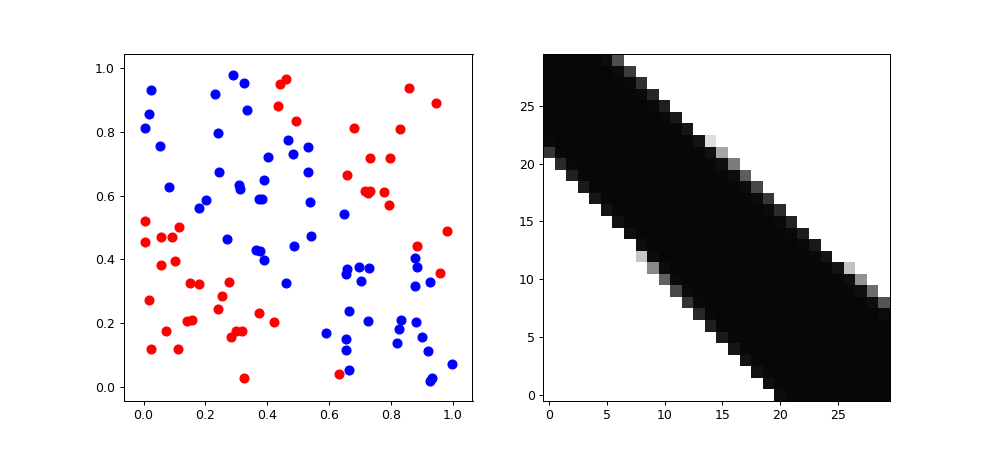

6.809396575891758


In [94]:
# XOR Problem
# for showing iteratively
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import warnings

# convert warnings to error
warnings.filterwarnings("error")

# learning rate
LR = 1.0
# learning times
LT = 1000
ShowX = None
ShowY = None

def tanh(a):
    #x1 = np.exp(a)
    #x2 = np.exp(-a)
    #y = (x1-x2)/(x1+x2)
    y = np.tanh(a)
    return y

def dtanh(o):
    y = 1-o**2
    return y

def sigmoid(a):
    y = 1.0/(1.0+np.exp(-a))
    return y

def dsigmoid(o):
    y = o*(1-o)
    return y

def compute_weights_error(derivative):
    ret = 0.1/LR * derivative
    return ret

class unit:
    layer = None
    weights = None
    derivative = None
    inputs = None
    index = 0
    output = 0.0
    
    def __init__(self, layer, index):
        self.layer = layer
        self.index = index
        prev_layer = layer.prev_layer
        if prev_layer == None:
            M = layer.network.M
        else:
            M = prev_layer.unit_number
        # initial weights should be random, otherwise the learning procedure will be wired
        self.weights = np.random.normal(0,4,M)
        self.derivative = np.zeros(M)
        
    def FP(self):
        prev_layer = self.layer.prev_layer
        if prev_layer != None:
            self.inputs = prev_layer.outputs
        else:
            self.inputs = self.layer.network.inputs
        
        s = 0.0
        for i in range(len(self.weights)):
            s += self.weights[i]*self.inputs[i]
        self.output = self.layer.act_func(s)
        self.layer.outputs[self.index] = self.output
        
    def BP(self, update_weight):
        next_layer = self.layer.next_layer
        if next_layer != None:
            K = next_layer.unit_number
            s = 0.0
            for k in range(K):
                s += next_layer.units[k].weights[self.index] * next_layer.errors[k]
            self.layer.errors[self.index] = s * self.layer.link_func(self.output)
        else:
            self.layer.errors[self.index] = self.output - self.layer.network.targets[self.index]
        self.derivative += self.layer.errors[self.index] * self.inputs
        if update_weight == 1:
            # Be careful while updateing the weights, pick proper learning rate
            self.weights -= compute_weights_error(self.derivative)
            self.derivative *= 0.0
        
    def dump(self):
        print("weights {}".format(self.weights))
        print("derivative {}".format(self.derivative))

class Layer:
    network = None
    unit_number = 0
    units = None
    outputs = None
    errors = None
    prev_layer = None
    next_layer = None
    
    act_func = tanh
    link_func = dtanh
    
    def __init__(self, K, afunc=tanh, lfunc=dtanh):
        self.unit_number = K
        self.outputs = np.zeros(K)
        self.errors = np.zeros(K)
        self.act_func = afunc
        self.link_func = lfunc

    def build_connection(self, network):
        self.network = network
        self.units = [unit(self, i) for i in range(self.unit_number)]
    
    def forward_propagation(self):
        for u in self.units:
            u.FP()
            
    def backward_propagation(self, update_weight):
        for u in self.units:
            u.BP(update_weight)
            
    def dump(self):
        for u in self.units:
            u.dump()
        print("outputs {}".format(self.outputs))
        print("errors {}".format(self.errors))
        

class Network:
    input_layer = None
    output_layer = None
    inputs = None
    targets = None
    M = 0
    
    def __init__(self, M):
        self.M = M
        return
    
    def add_layer(self, layer):
        if self.input_layer == None:
            self.input_layer = layer
        else:
            layer.prev_layer = self.output_layer
            self.output_layer.next_layer = layer
            
        self.output_layer = layer
        layer.build_connection(self)
        
    def train(self, observations, targets):
        N = len(observations)
        for n in range(N):
            self.inputs = observations[n]
            self.targets = targets[n]
            
            layer = self.input_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            
            # gradient descent/stotastic gradient descent
            if n == N-1:
                update_weight = 1
            else:
                update_weight = 0
            layer = self.output_layer
            while layer != None:
                layer.backward_propagation(update_weight)
                layer = layer.prev_layer

    def Get_Error(self, observations, targets, show):
        N = len(observations)
        es = 0.0
        for n in range(N):
            self.inputs = observations[n]
            self.targets = targets[n]
            
            layer = self.input_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            #print("target {}".format(self.targets))
            #print("output {}".format(self.output_layer.outputs))
            #e = np.sum(self.targets * np.log(self.output_layer.outputs))
            # for sigmoid only
            e = self.targets[0] * np.log(self.output_layer.outputs[0]) \
                + (1 - self.targets[0]) * np.log(1 - self.output_layer.outputs[0])
            es += e
            if show == 1:
                print(self.targets, self.output_layer.outputs)
        return -es
                
    def test(self, new_input):
        self.inputs = new_input
        
        layer = self.input_layer
        while layer != None:
            layer.forward_propagation()
            layer = layer.next_layer
        return self.output_layer.outputs
    
    def dump(self):
        layer = self.input_layer
        while layer != None:
            layer.dump()
            layer = layer.next_layer
        return
            

def build_network():
    network = Network(3)
    # more parameter gives more accuracy?
    layer1 = Layer(6)
    network.add_layer(layer1)
    #layer11 = Layer(4)
    #network.add_layer(layer11)
    layer2 = Layer(2, sigmoid, dsigmoid)
    network.add_layer(layer2)
    return network
    
'''
def training(network): 
    x1 = np.random.uniform(0, 1, 100)
    x2 = np.random.uniform(0, 1, 100)
    #x3 = np.ones(x1.shape)
    X = np.array([x1, x2]).T
    t1 = 1 * np.logical_or(x1+x2<0.7, x1+x2>1.3)
    t2 = 1 - t1
    T = np.array([t1, t2]).T
    for i in range(LT):
        global LR
        LR += 1
        network.train(X, T)
    return

def test_pic(network):
    fig = plt.figure(figsize=(5,5), dpi=60)
    ax = fig.add_subplot(1,1,1)
    
    w = 100
    h = 100
    n = w*h
    x1, x2 = np.mgrid[0:1:w*1j, 0:1:h*1j]
    X1 = x1.reshape((n, 1))
    X2 = x2.reshape((n, 1))
    X = np.c_[X1,X2]
    Y = np.zeros(n)
    for i in range(n):
        Y[i] = network.test(X[i])[0]
    image = Y.reshape((w,h))
    ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest', origin='lower')
    plt.show()
    return

def test(network):
    y = network.test(np.array([0.5,0.9]))
    print(y)

def main():
    network = build_network()
    training(network)
    #test(network)
    test_pic(network)
    #network.dump()
'''

def gen_grid(w, h):
    n = w*h
    x1, x2 = np.mgrid[0:1:w*1j, 0:1:h*1j]
    X1 = x1.reshape((n, 1))
    X2 = x2.reshape((n, 1))
    X = np.c_[X1, X2, np.ones(X1.shape)]
    Y = np.zeros(n)
    return X, Y

def show_pic(network, ax, fig, init=0):
    global ShowX, ShowY
    w = 30
    h = 30
    n = w*h
    
    if init == 1:
        ShowX, ShowY = gen_grid(w, h)
        show_pic.init = 0
        
    for i in range(n):
        ShowY[i] = network.test(ShowX[i])[0]
    image = ShowY.reshape((w,h))
    if len(ax.images) == 0:
        # origin = 'lower' for Cartesian coordinate display
        ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest', origin='lower')
    else:
        ax.images[0].set_data(image)
    fig.canvas.draw()

def plot_points(ax, X, T):
    for i in range(len(X)):
        if T[i][0]==1:
            ax.scatter(X[i][0], X[i][1], s=50, color='red')
        elif T[i][0]==0:
            ax.scatter(X[i][0], X[i][1], s=50, color='blue')
    
def gen_training_data(ax):
    x1 = np.random.uniform(0, 1, 100)
    x2 = np.random.uniform(0, 1, 100)
    #x1, x2 = np.mgrid[0:1:10j, 0:1:10j]
    #x1 = np.reshape(x1, (100,))
    #x2 = np.reshape(x2, (100,))
    X = np.array([x1, x2]).T
    X = np.c_[X, np.ones((100,1))]
    #t1 = 1 * np.logical_or(x1+x2<0.5, x1+x2>1.5)
    t1 = 1 * np.logical_or(x1+x2<0.7, x1+x2>1.3)
    t2 = 1 - t1
    T = np.array([t1, t2]).T
    plot_points(ax, X, T)
    return X, T

def training_show_process(network, X, T, fig, ax):
    show_pic(network, ax, fig, 1)

    for i in range(LT):
        global LR
        LR = np.log(i+2)*0.1 + 1
        #LR += 0.1
        network.train(X, T)
        if i % 10 == 9:
            show_pic(network, ax, fig)
    return
    
def main():
    fig = plt.figure(figsize=(11,5), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    best_network = None
    best_error = np.finfo(float).max
    X, T = gen_training_data(ax1)

    # train multiple times to avoid local minima
    for i in range(10):
        global LR
        LR = 1.0
        network = build_network()
        training_show_process(network, X, T, fig, ax2)
        error = network.Get_Error(X, T, 0)
        if error < best_error:
            best_network = network
            best_error = error
            
    show_pic(best_network, ax2, fig)
    print(best_error)

if __name__=="__main__":
    main()

*Bias can guarantee the output of a layer non-zero in the case that all the other inputs of such layer are zero.*


------------------
# Efficiency of backpropagation

## Computational effort of <font color='red'>backpropagation</font>

For sufficiently large $W$, a single evaluation of the error function (for a given input pattern) would require $O(W)$ operations.

A single evaluation refers to that a input pattern goes through the whole system and makes the weights change. In the process, there is only one run of forward propagation and backward propagation, which are denoted by

$$\begin{array}{ll}
\text{Forward Propagation:} & a_j = \sum_i w_{ji}z_i &(5.48)\\
\text{Backward Propagation:} & \delta_j \equiv h'(a_j) \sum_{k}w_{kj}\delta_k &(5.56) 
\end{array}$$

where FP and BP have both $W$ multiplications and $W$ additions totally because each weight computes once in FP and BP. The computational effort is therefore $O(W)$ for a single unit.


## Computational effort of <font color='red'>finite differences</font>

Finite differences is an alternative approach to computing the derivatives of the error function. It has two kinds of forms as follows

$$\begin{array}{ll}
\text{Forward differences:} & \frac{\partial E_n}{\partial w_{ji}} = \frac{E_n(w_{ji}+\epsilon)-E_n(w_{ji})}{\epsilon}+O(\epsilon) &(5.68)\\
\text{Central differences:} & \frac{\partial E_n}{\partial w_{ji}} = \frac{E_n(w_{ji}+\epsilon)-E_n(w_{ji}-\epsilon)}{2\epsilon}+O(\epsilon^2 ) &(5.69)
\end{array}$$

where $\epsilon \ll 1$, which leads to $0(\epsilon)\simeq 0$ and $O(\epsilon^2) \simeq 0$. 

From the definition, we can see the following properties
- The accuracy of the central differences is higher than the forward differences. 
- For a single unit, we just need to compute $E_{n}(w_{ji}+\epsilon)$ in the case of forward differences ($E_{n}(w_{ji})$ is the same for all the other units), while in the case of central differences, we need to compute $E_n(w_{ji}+\epsilon)$ and $E_n(w_{ji}-\epsilon)$, where the computational steps doubled.

Using finite differences, we can evaluate the derivatives through forward propagation merely. But the main problem is that the computational effort becomes $O(W^2)$. Because one run of FP have $W$ multiplications and $W$ additions in total, where $W$ expresses that each weight computes once in FP, and there are $W$ units in the network, so that the overall scaling is $O(W^2)$.

## Usage in practice
When training networks in practice, derivatives should be evaluated using backpropagation algorithm, because this gives the greatest accuracy and numerical efficientcy. However, the results should be compared with numerical differentiation using (5.69) for some test cases in order to check the correctness of the implementation.


--------------

# The Jacobian matrix

## Definition
Jacobian matrix is matrix whose elements are given by the derivatives of the network outputs with respect to the inputs

$$J_{ki}\equiv \frac{\partial y_k}{\partial x_i} \tag{5.70}$$


## Usage
Jacobian matrices play a useful role in systems built from a number of distinct modules. (Figure 5.8)
$$ \left .\begin{array}{rr}
\mathbf{u}\rightarrow & \color{green}{\fbox{module A}}& \overset{\mathbf{v}}{\rightarrow}\\
\mathbf{x}\rightarrow & \color{blue}{\fbox{module B}} & \overset{\mathbf{z}}{\rightarrow}
\end{array}\right\}
\color{red}{\fbox{module C}} \rightarrow \mathbf{y}
$$

Assume that $\color{blue}{\fbox{module B}}$ is control by a parameter denoted by $w$. The derivative of the error function is given by

$$\begin{align*}
\frac{\partial E}{\partial w} &= \sum_{k,j}\frac{\partial E}{y_k}\frac{\partial y_k}{\partial z_j}\frac{\partial z_j}{\partial w} \tag{5.71}\\
\end{align*}$$

in which the Jacobian matrix for $\color{red}{\fbox{module C}}$ appears in the middle term.

## Derivation

$$J_{ki} = \frac{\partial y_k}{\partial x_i} = \sum_j\frac{\partial y_k}{\partial a_j} \frac{\partial a_j}{\partial x_i}=\sum_j w_{ji}\frac{\partial y_k}{\partial a_j} \tag{5.73}$$

where $\frac{\partial y_k}{\partial a_j}$ can be written to a recursive backpropagation formula.

$$\color{red}{\frac{\partial y_k}{\partial a_j}} = \sum_l \frac{\partial y_k}{\partial a_l}\frac{\partial a_l}{\partial a_j}= h'(a_j)\sum_l w_{lj}\color{red}{\frac{\partial y_k}{\partial a_l}} \tag{5.74}$$

The activation function in the output layer could be regression, sigmoid and softmax so that their derivatives with respect to $a_j$, namely $\frac{\partial y_k}{\partial a_j}$, can be found directly from the functional form of the output-unit activation function.

$$\begin{align*}
&\text{regression:} & \frac{\partial y_k}{\partial a_j} &= I_{kj}\\
&\text{sigmoid:} & \frac{\partial y_k}{\partial a_j} &= I_{kj}\sigma'(a_j) \tag{5.75}\\
&\text{softmax:} & \frac{\partial y_k}{\partial a_j} &= I_{kj}y_k-y_ky_j \tag{5.76}
\end{align*}$$

where $I_{kj}$ is the element of the identity matrix. And we have derived these formulas of derivative in chapter 4.

## Conclusion

The procedure for evaluating the jacobian matrix is as follows.

> 1. Apply the input vector corresponding to the point in input space at which the Jacobian matrix is to be found, and forward propagate in the usual way to obtain the activation of all of the hidden and output units in the network.
> 2. For each row $k$ of the Jacobian matrix, corresponding to the output unit $k$, backpropagate using the recursive relation (5.74), starting with (5.75) or (5.76), for all of the hidden units in the network.
> 3. Use (5.73) to do the backpropagation to the inputs.

Again, the implementation of such algorithms can be checked by using numerical differentiation in the form

$$\frac{\partial y_k}{\partial x_i} = \frac{y_k(x_i+\epsilon)-y_k(x_i-\epsilon)}{2\epsilon} + O(\epsilon^2) \tag{5.77}$$